# Human proteins Network



In [1]:
import csv
import scipy 
from scipy import sparse
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt

The following lines of code are used to import the adjacency matrix of the human proteins network. 
Then, a scipy sparse matrix is created to store such matrix.

### Import Adjacency matrix

In [2]:
class Network():
    
    def __init__(self,filename):
        self.filename = filename
        self.import_Network()
        
    def import_Network(self):

        list_rows=[]

        with open(self.filename) as tsvfile:
            reader = csv.DictReader(tsvfile, dialect='excel-tab')
            for row in reader:
                s = row['% asym unweighted'].split()
                list_rows.append(list(map(int, s)) )
    
        vals = np.array(list_rows)

        self.row = vals[:,0]
        self.col = vals[:,1]
        self.data = np.ones(vals.shape[0])
        self.num_vertices = int(np.max(self.row))
        self.num_edges = int(np.sum(self.data))
        
        
        self.adjacency = scipy.sparse.csr_matrix( (self.data, (self.row,self.col)), 
                                                 shape = (self.num_edges,self.num_edges))
        self.set_laplacian_matrix()
        
        
    def set_laplacian_matrix(self):
        out_degree = self.get_outdegree()
        
        self.laplacian = scipy.sparse.lil_matrix((self.num_edges,self.num_edges))
        self.laplacian.setdiag(np.array(out_degree).flatten())
        self.laplacian = self.laplacian - scipy.sparse.lil_matrix(self.adjacency)
        self.laplacian = scipy.sparse.csr_matrix(self.laplacian)        
        
        
    def get_indegree(self):
        degs = self.adjacency.sum(axis = 0)
        return degs.flatten()
    
    def get_outdegree(self):
        degs = self.adjacency.sum(axis = 1)
        return degs.flatten()
    

net = Network('out.maayan-figeys')


### Get adjacency matrix

In [3]:
A = net.adjacency

Eigenvalues and eigenvectors:

In [4]:
vals, vecs = scipy.sparse.linalg.eigs(A, k=100)
vals_A = vals.astype(float)
vecs_A = vecs.astype(float)

/home/vant/anaconda3/envs/ComplexNetworks/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/vant/anaconda3/envs/ComplexNetworks/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


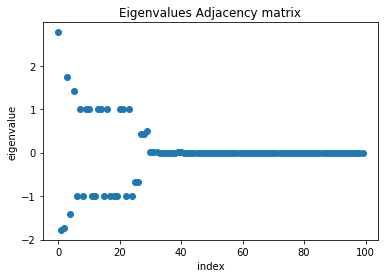

In [5]:
plt.plot(np.arange(vals_A.shape[0]),vals_A, 'o')
plt.title("Eigenvalues Adjacency matrix")
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.show()

### Get laplacian matrix

In [6]:
L = net.laplacian

Eigenvalues and eigenvectors

In [7]:
vals, vecs = scipy.sparse.linalg.eigs(L, k=50)
vals_L = vals.astype(float)
vecs_L = vecs.astype(float)


/home/vant/anaconda3/envs/ComplexNetworks/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/vant/anaconda3/envs/ComplexNetworks/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


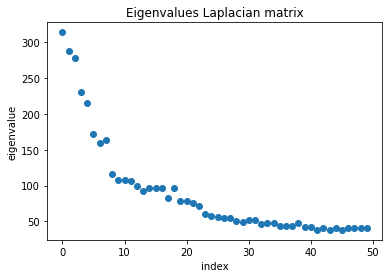

In [8]:
plt.plot(np.arange(vals_L.shape[0]),vals_L,'o')
plt.title("Eigenvalues Laplacian matrix")
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.show()

### Get number of vertices and edges

In [9]:
print('number of vertices: ', net.num_vertices, 'number of edges', net.num_edges)

number of vertices:  2179 number of edges 6452


### Get indegrees and outdegrees of vertices

In [10]:
indegree = net.get_indegree()

outdegree = net.get_outdegree()

print('Indegree: ', indegree)
print('Outdegree: ', outdegree)

Indegree:  [[ 0.  1. 14. ...  0.  0.  0.]]
Outdegree:  [[ 0. 26.  0. ...  0.  0.  0.]]


## NetworkX

We can also define the graph using the NetworkX package.

In [11]:
import networkx as nx

In [12]:
G = nx.from_scipy_sparse_matrix(net.adjacency, create_using = nx.DiGraph())

We can try visualizing the network

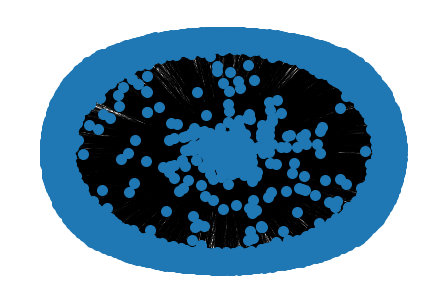

In [182]:
nx.draw(G, pos=nx.spring_layout(G), width = 0.5, node_size=50)

We can also try to visualize the graph where the size of the nodes is proportional to its degree

In [13]:
d = dict(G.degree)

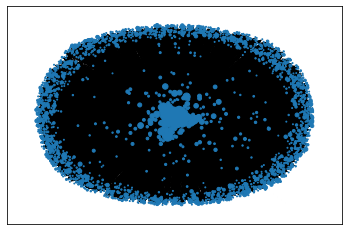

In [169]:
d = dict(G.degree)

nx.draw_networkx(G, with_labels=False, nodelist=list(d.keys()), node_size=[v for v in d.values()])
plt.show()

Ups... we can't see anything... Let's select a subgraph of $G$ and plot it.

We select n random nodes and visualize their network.

In [172]:
idx = np.random.choice(net.num_vertices, 500)
G_s = G.subgraph(idx)

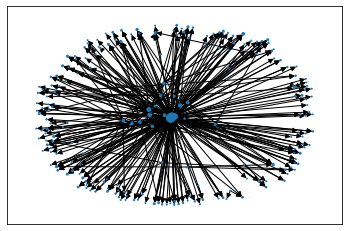

In [173]:
d_s = dict(G_s.degree)

nx.draw_networkx(G_s, with_labels=False, nodelist=list(d_s.keys()), node_size=[v*5 for v in d_s.values()])
plt.show()

We can also visualize the network without edges

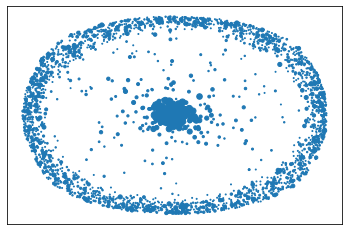

In [178]:
d = dict(G.degree)

nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, 
                       nodelist=list(d.keys()), node_size=[v*5 for v in d.values()])
plt.show()

Or maybe we can draw the network with a subset of edges

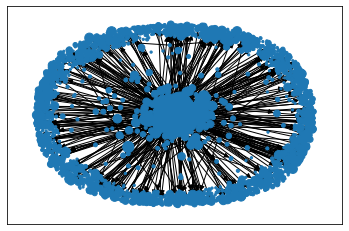

In [208]:
idx = np.random.choice(net.num_edges, 500)

edges = list(G.edges(idx))

nx.draw_networkx(G,pos = nx.spring_layout(G), with_labels=False, nodelist=list(d.keys()),
                       node_size=[v*5 for v in d.values()], edgelist = edges)
plt.show()

With this structure we can also get the inner and outer degrees:

In [153]:
d_in = dict(G.in_degree)
print('In degrees of the network:', list(d_in.values()))

In degrees of the network: [0, 1, 14, 0, 1, 0, 12, 12, 3, 19, 0, 12, 0, 2, 17, 1, 1, 10, 1, 2, 1, 1, 12, 5, 0, 7, 5, 3, 12, 0, 0, 10, 1, 0, 1, 0, 3, 3, 3, 9, 0, 4, 3, 14, 3, 6, 1, 4, 14, 14, 1, 2, 7, 2, 1, 3, 4, 0, 10, 1, 1, 1, 13, 0, 12, 0, 12, 1, 3, 0, 4, 0, 3, 3, 5, 1, 14, 1, 1, 6, 0, 1, 6, 2, 0, 10, 0, 3, 0, 1, 0, 1, 5, 5, 7, 0, 16, 4, 0, 3, 0, 0, 11, 0, 0, 9, 1, 17, 2, 3, 4, 2, 1, 2, 3, 3, 1, 1, 10, 4, 5, 2, 15, 6, 0, 7, 3, 1, 2, 0, 13, 2, 0, 1, 0, 13, 0, 0, 2, 0, 1, 4, 1, 0, 5, 11, 6, 8, 0, 4, 8, 0, 2, 7, 1, 1, 1, 8, 1, 0, 2, 4, 1, 12, 13, 11, 6, 2, 8, 2, 2, 2, 1, 1, 1, 0, 3, 3, 2, 1, 2, 0, 3, 2, 1, 3, 1, 2, 3, 4, 10, 0, 2, 3, 8, 2, 0, 9, 1, 12, 3, 0, 7, 0, 8, 0, 1, 3, 4, 5, 0, 9, 1, 3, 2, 5, 1, 4, 12, 8, 5, 1, 1, 17, 3, 2, 10, 2, 1, 2, 0, 4, 0, 4, 1, 1, 2, 4, 1, 0, 2, 2, 3, 0, 1, 13, 0, 6, 0, 2, 5, 1, 10, 3, 0, 6, 1, 1, 0, 5, 12, 4, 0, 1, 0, 4, 3, 14, 16, 1, 1, 9, 0, 0, 1, 1, 3, 1, 0, 1, 1, 0, 6, 2, 1, 4, 6, 13, 1, 0, 4, 0, 1, 10, 3, 13, 9, 3, 8, 8, 1, 7, 0, 0, 8, 1, 2, 3, 0, 4,

In [154]:
d_out = dict(G.out_degree)
print('Out degrees of the network:', list(d.values()))

Out degrees of the network: [0, 27, 14, 14, 1, 41, 12, 12, 111, 19, 172, 12, 12, 2, 24, 1, 23, 10, 8, 2, 9, 1, 12, 5, 30, 7, 5, 21, 12, 76, 2, 35, 1, 314, 3, 6, 3, 3, 102, 9, 3, 4, 3, 14, 10, 6, 12, 4, 52, 14, 93, 165, 15, 15, 1, 3, 22, 44, 10, 1, 4, 1, 13, 8, 12, 4, 12, 39, 6, 6, 4, 40, 3, 233, 5, 31, 14, 13, 55, 6, 52, 1, 6, 2, 54, 10, 3, 3, 3, 1, 116, 4, 25, 8, 8, 107, 16, 10, 8, 3, 1, 11, 11, 38, 3, 9, 1, 17, 2, 3, 36, 2, 1, 31, 3, 3, 1, 47, 10, 21, 5, 2, 24, 6, 215, 17, 3, 25, 2, 288, 13, 2, 33, 1, 35, 13, 7, 42, 2, 2, 1, 4, 1, 4, 5, 25, 11, 11, 6, 4, 8, 56, 2, 9, 1, 19, 1, 8, 1, 160, 2, 4, 17, 12, 13, 11, 6, 2, 80, 2, 3, 2, 48, 1, 13, 21, 3, 3, 2, 1, 2, 41, 3, 2, 12, 3, 1, 2, 3, 4, 10, 9, 2, 3, 15, 2, 10, 9, 80, 12, 3, 57, 7, 49, 8, 50, 1, 3, 4, 5, 5, 9, 15, 41, 2, 9, 1, 6, 14, 8, 9, 2, 1, 17, 8, 2, 10, 99, 1, 2, 3, 4, 14, 4, 1, 11, 2, 4, 1, 60, 2, 2, 3, 4, 1, 13, 20, 6, 1, 2, 5, 1, 10, 3, 41, 11, 3, 1, 6, 5, 12, 4, 16, 1, 5, 4, 3, 40, 16, 20, 3, 9, 3, 2, 1, 1, 3, 1, 6, 1, 1, 4, 

## Centralities

We will calculate (and try to visualize) different node centralities.


### 1. Closeness centrality

Closeness centrality $C(u)$ of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.

$$ C(u) = \frac{n-1}{N-1} \frac{n-1}{\sum_{v=1}^{n-1} d(v,u)} $$

where $N$ is the number of nodes in the graph. 

We draw the network with sizes proportional to the closeness centrality

In [20]:
CC = nx.closeness_centrality(G)
CC

{0: 0.0,
 1: 0.0001550147263990079,
 2: 0.003205836469358206,
 3: 0.0,
 4: 0.0001550147263990079,
 5: 0.0,
 6: 0.0028914663991524794,
 7: 0.0021381341572276956,
 8: 0.001169922463388739,
 9: 0.003411083856887973,
 10: 0.0,
 11: 0.0026405727428225854,
 12: 0.0,
 13: 0.0003100294527980158,
 14: 0.0030476196209513686,
 15: 0.002201417188324166,
 16: 0.0001550147263990079,
 17: 0.0018038077253702738,
 18: 0.0007750736319950396,
 19: 0.0007225686440211819,
 20: 0.00020668630186534384,
 21: 0.00020668630186534384,
 22: 0.0021523198550016096,
 23: 0.0007972185929091835,
 24: 0.0,
 25: 0.0011414720762108765,
 26: 0.0008439690659501543,
 27: 0.0022105973306900777,
 28: 0.003188874371636734,
 29: 0.0,
 30: 0.0,
 31: 0.002853680190527191,
 32: 0.00020668630186534384,
 33: 0.0,
 34: 0.0001550147263990079,
 35: 0.0,
 36: 0.0005536240228535997,
 37: 0.0004650441791970237,
 38: 0.0004650441791970237,
 39: 0.00251784948981918,
 40: 0.0,
 41: 0.0012249944232506967,
 42: 0.0004650441791970237,
 43: 0.00

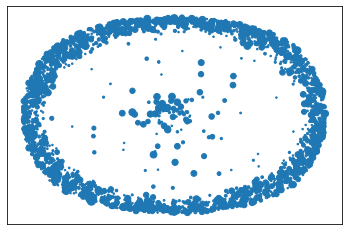

In [205]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*15000 for v in CC.values()])
plt.show()

Most of the nodes have similar closeness centrality.

### 2. Betweenness centrality 

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$:

$$
c_B(v) = \sum_{s,t \in V} \frac{\sigma(s,t|v)}{\sigma(s,t)}
$$

where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths, and $\sigma(s,t|v)$ is the number of those paths passing through some node $v$ other than $s,t$. If $s=t$, $\sigma(s,t)=1$, and if $v \in s,t$,  $\sigma(s,t|v)=0$. 

We draw the network with sizes proportional to the betweeness centrality

In [202]:
CB = nx.betweenness_centrality(G)
CB

{0: 0.0,
 1: 3.0522279461510083e-06,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 4.027178447585596e-05,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 7.4262868926036345e-06,
 15: 0.0,
 16: 1.2497311275578932e-06,
 17: 0.0,
 18: 4.878758055658698e-06,
 19: 0.0,
 20: 2.908028200663559e-06,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 8.916350929307278e-06,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 4.022371789402681e-05,
 32: 0.0,
 33: 0.0,
 34: 2.403329091457487e-08,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 1.1179485823763078e-05,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 5.4555570376084956e-06,
 45: 0.0,
 46: 6.008322728643717e-07,
 47: 0.0,
 48: 0.00015909237475751414,
 49: 0.0,
 50: 2.042829727738864e-06,
 51: 1.6979520031147143e-05,
 52: 1.3939308730453423e-06,
 53: 5.767989819497968e-07,
 54: 0.0,
 55: 0.0,
 56: 3.837716004209031e-05,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 7.20998727437246e-08,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 

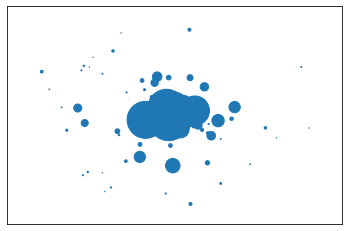

In [203]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1e7 for v in CB.values()])
plt.show()

There are very few nodes with high betweeness centrality. Their betweeness centrality is two or three orders of magnitude larger than the other nodes' betweeness centrality.

### 3. Eigenvector centrality

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node $i$ is the $i-th$ element of the vector $x$ defined by the equation

$$
Ax = \lambda x
$$

where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $\lambda$. By virtue of the Perron–Frobenius theorem, there is a unique solution $x$, all of whose entries are positive, if $\lambda$ is the largest eigenvalue of the adjacency matrix $A$.

We draw the network with sizes proportional to the eigenvector centrality.

In [190]:
EC = nx.eigenvector_centrality(G)
EC

{0: 4.553875613402168e-13,
 1: 9.107751226804333e-12,
 2: 0.02102849598485564,
 3: 4.553875613402168e-13,
 4: 9.107751226804333e-12,
 5: 4.553875613402168e-13,
 6: 0.002429252943319432,
 7: 3.894019037020195e-09,
 8: 2.7450789520841947e-06,
 9: 0.0024292532374997964,
 10: 4.553875613402168e-13,
 11: 0.006724534832869977,
 12: 4.553875613402168e-13,
 13: 1.776011489226846e-11,
 14: 0.00016774149818560053,
 15: 0.0001168657646829685,
 16: 9.107751226804333e-12,
 17: 5.542066621510437e-10,
 18: 0.0001696130572713971,
 19: 9.792511901524614e-05,
 20: 8.697902421598138e-11,
 21: 8.697902421598138e-11,
 22: 1.5578808473448818e-09,
 23: 2.7733102485619225e-10,
 24: 4.553875613402168e-13,
 25: 2.946357521871206e-10,
 26: 1.9945975186701512e-10,
 27: 0.1101065427227125,
 28: 0.2650959830440055,
 29: 4.553875613402168e-13,
 30: 4.553875613402168e-13,
 31: 0.12248868543111513,
 32: 8.697902421598138e-11,
 33: 4.553875613402168e-13,
 34: 9.107751226804333e-12,
 35: 4.553875613402168e-13,
 36: 1.82

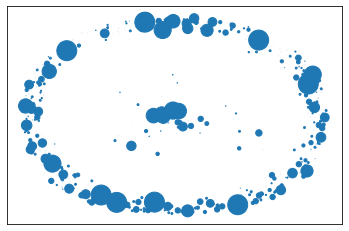

In [206]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e3 for v in EC.values()])
plt.show()

Notice that there are few nodes with high eigenvector centrality.

### 4. Page-rank centrality

The page-rank centrality of a node tries to balance the number of links the node receives, the link propensity of the linkers and the centrality of the linkers. The page-rank centrality of a node $x_i$ is computed as follows:

$$
PR(x_i) = \alpha \sum_j a_{ji}\frac{x_j}{L(j)}+\frac{1-\alpha}{N},
$$
where $N$ is the number of nodes, $L(j)$ is the out-degree of the $j$-th node and $\alpha\in[0,1]$. It is very common to take $\alpha=0.85$.

We draw the network with sizes proportional to the page-rank centrality.

In [21]:
PRC = nx.pagerank(G)
PRC

{0: 0.0001473650156530009,
 1: 0.00015042108595763449,
 2: 0.0001971969832444315,
 3: 0.0001473650156530009,
 4: 0.0001563149358308564,
 5: 0.0001473650156530009,
 6: 0.0001941761823669192,
 7: 0.00020239190940814664,
 8: 0.00015054809407615937,
 9: 0.00018480175831335518,
 10: 0.0001473650156530009,
 11: 0.0001778125394718946,
 12: 0.0001473650156530009,
 13: 0.0002204560304388207,
 14: 0.0003883604795662955,
 15: 0.0001943499462752009,
 16: 0.00027266389814297777,
 17: 0.00017834194388649432,
 18: 0.0001581650341313396,
 19: 0.00018740731089535208,
 20: 0.00015228457342998837,
 21: 0.00015792380159252727,
 22: 0.0002040500197171843,
 23: 0.0001681137649011189,
 24: 0.0001473650156530009,
 25: 0.00018388309834928187,
 26: 0.00015651403846405487,
 27: 0.0002047952210530032,
 28: 0.00020505384810191196,
 29: 0.0001473650156530009,
 30: 0.0001473650156530009,
 31: 0.00017685058210088037,
 32: 0.00015792380159252727,
 33: 0.0001473650156530009,
 34: 0.00014776405668003904,
 35: 0.00014736

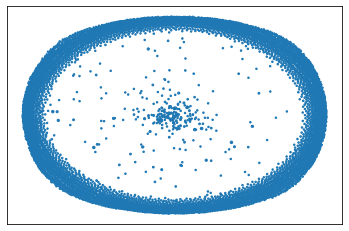

In [26]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e4 for v in PRC.values()])
plt.show()

We observe that all nodes have a similar page rank centrality. It is due to the fact that the vector of page-rank centralities adds up to 1 and there are a lot of nodes, so the mass gets quite shared.

Let us now highlight the 10 nodes with highest centrality by plotting them in red. Moreover, we are going to increase a bit the size of the nodes, while keeping it related with its centrality value.

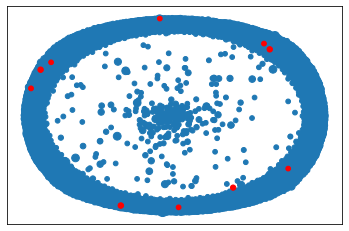

In [63]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e5 for v in PRC.values()])
max_list = list({k: v for k, v in sorted(PRC.items(), key=lambda item: item[1], reverse=True)[0:10]}.keys())
sub_G = G.subgraph(max_list)
nx.draw_networkx_nodes(sub_G, pos = nx.spring_layout(G), with_labels=False, node_color='r',
                      node_size=[v*1.5e5 for v in PRC.values()])
plt.show()

### 5. Katz centrality

Katz centrality generalizes degree centrality by measuring the number of nodes that are reachable while weighting them accoriding to their proximity. That is, it penalizes those who are further. The Katz centrality of the $i$-th node is defined as

$$
KC(x_i) = \left[ \sum_{k=0}^\infty \left( \alpha^kA^k \right)\boldsymbol{e} \right]_i,
$$

where $\boldsymbol{e}=(1,1,...,1)^T$.

We draw the network with sizes proportional to the Katz centrality. In addition, we are going to plot in red the nodes with highest centrality.

In [45]:
KC = nx.katz_centrality(G)
KC

{0: 0.010838338725977179,
 1: 0.011922172598574898,
 2: 0.027800043595784567,
 3: 0.010838338725977179,
 4: 0.011922172598574898,
 5: 0.010838338725977179,
 6: 0.02544336660346375,
 7: 0.024853394532538268,
 8: 0.015060911598346046,
 9: 0.0333553538734271,
 10: 0.010838338725977179,
 11: 0.025574141781764616,
 12: 0.010838338725977179,
 13: 0.013006006471172614,
 14: 0.031771564343208464,
 15: 0.01401549204969481,
 16: 0.011922172598574898,
 17: 0.02232697777551299,
 18: 0.012566883374085767,
 19: 0.013178858789992405,
 20: 0.01203055598583467,
 21: 0.01203055598583467,
 22: 0.025264167570252804,
 23: 0.016582658250745085,
 24: 0.010838338725977179,
 25: 0.01875032599594052,
 26: 0.01647427486348531,
 27: 0.01684240478263265,
 28: 0.030829964699296424,
 29: 0.010838338725977179,
 30: 0.010838338725977179,
 31: 0.025915618491850586,
 32: 0.01203055598583467,
 33: 0.010838338725977179,
 34: 0.011922172598574898,
 35: 0.010838338725977179,
 36: 0.014306607118289877,
 37: 0.014089840343770

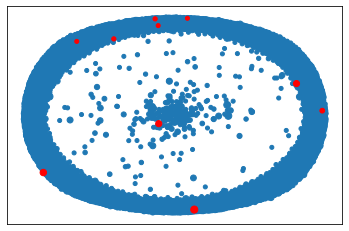

In [65]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_size=[v*1.5e3 for v in KC.values()])
max_list = list({k: v for k, v in sorted(KC.items(), key=lambda item: item[1], reverse=True)[0:10]}.keys())
sub_G = G.subgraph(max_list)
nx.draw_networkx_nodes(sub_G, pos = nx.spring_layout(G), with_labels=False, node_color='r',
                      node_size=[v*1.5e3 for v in KC.values()])
plt.show()

We observe that all the nodes have a very similar Katz centrality value.

### 6. Clustering

The clustering coefficient of a node provides information about the clustering tendency of its neighbors. The clustering coefficient of the $i$-th node is computed as:

$$
CLT(x_i)=\frac{\text{#triangles connected to $i$}}{\text{#possible triangles connected to $i$}}.
$$

Let us begin by computing the average clustering coefficient for the graph.

In [67]:
nx.average_clustering(G)

0.007982065618865431

Let us now draw the network with sizes proportional to the clustering coefficient. In addition, we are going to use different colors to help visualization. The nodes whose coefficients are zero, will be plotted with small red dots.

In [68]:
CLT = nx.clustering(G)
CLT

{0: 0,
 1: 0.01566951566951567,
 2: 0.027472527472527472,
 3: 0,
 4: 0,
 5: 0.00548780487804878,
 6: 0,
 7: 0.015151515151515152,
 8: 0.009829619921363041,
 9: 0.005847953216374269,
 10: 0.0009519923840609275,
 11: 0.015151515151515152,
 12: 0,
 13: 0,
 14: 0.02909090909090909,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0.06944444444444445,
 21: 0,
 22: 0.03787878787878788,
 23: 0.1,
 24: 0.0034482758620689655,
 25: 0.023809523809523808,
 26: 0,
 27: 0.16826923076923078,
 28: 0.17424242424242425,
 29: 0.0010526315789473684,
 30: 0,
 31: 0.0893760539629005,
 32: 0,
 33: 0.0005494393683482225,
 34: 0.16666666666666666,
 35: 0,
 36: 0,
 37: 0,
 38: 0.0037856726849155504,
 39: 0.16666666666666666,
 40: 0,
 41: 0,
 42: 0,
 43: 0.12087912087912088,
 44: 0.05555555555555555,
 45: 0,
 46: 0.007575757575757576,
 47: 0,
 48: 0.07445200302343159,
 49: 0.02197802197802198,
 50: 0.0023375409069658717,
 51: 0.0031781226903178123,
 52: 0.1,
 53: 0.009615384615384616,
 54: 0,
 55: 0,
 56: 0.17105263

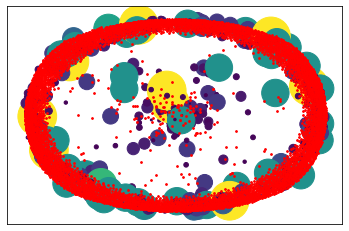

In [75]:
nx.draw_networkx_nodes(G,pos = nx.spring_layout(G), with_labels=False, node_color=[v*10 for v in CLT.values()],
                      node_size = [v*1.5e3 for v in CLT.values()])
zero_nodes = [k for k, v in CLT.items() if v == 0]
sub_G = G.subgraph(zero_nodes)
nx.draw_networkx_nodes(sub_G, pos = nx.spring_layout(G), with_labels=False, node_color='r',
                      node_size=3)
plt.show()

Notice that there is a wide variety of behaviors. 